In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf

方位混叠

TBP: -800
N: 6400
KT: -111111111.11111112


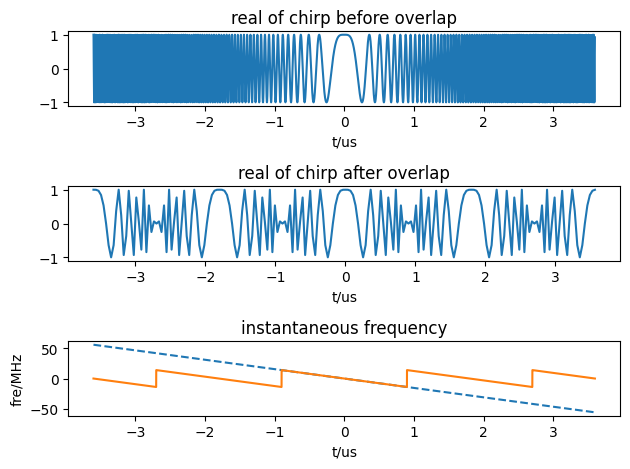

In [ ]:
TBP = 800
T = 7.2e-6
K = -TBP/(T**2)

ADC_sampling_frequency = np.abs(8*K*T)
interval_base = 1/ADC_sampling_frequency
N = int(T*ADC_sampling_frequency)
t_l = np.linspace(-T/2,T/2-interval_base,N)
t_c = 0
x_chirp = np.exp(1j*np.pi*K*((t_l-t_c)**2))
print('TBP:',round(K*T**2))
print('N:',N)
print('KT:',K*T)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t_l*1e+6,np.real(x_chirp))
plt.xlabel('t/us')
plt.title("real of chirp before overlap")

plt.subplot(3,1,2)
ADC_sampling_frequency_ol = np.abs(K*T/4)
interval_base_ol = 1/ADC_sampling_frequency_ol
N_ol = int(T*ADC_sampling_frequency_ol)
t_l_ol = np.linspace(-T/2,T/2-interval_base_ol,N_ol)
x_chirp_ol = np.exp(1j*np.pi*K*((t_l_ol-t_c)**2))
plt.plot(t_l_ol*1e+6,np.real(x_chirp_ol))
plt.xlabel('t/us')
plt.title("real of chirp after overlap")

plt.subplot(3,1,3)
plt.plot(t_l*1e+6,1e-6*np.linspace(-K*T/2,K*T/2-K*T/N,N),'--')
x_olangle = np.mod(np.linspace(-K*T/2,K*T/2-K*T/N,N),K*T/4)
x_offset = -K*T/4 + x_olangle[x_olangle<K*T/8]
x_olangle[x_olangle<K*T/8] =  x_offset
plt.plot(t_l*1e+6,1e-6*(x_olangle))
plt.xlabel('t/us')
plt.ylabel('fre/MHz')
plt.title('instantaneous frequency')
plt.tight_layout()

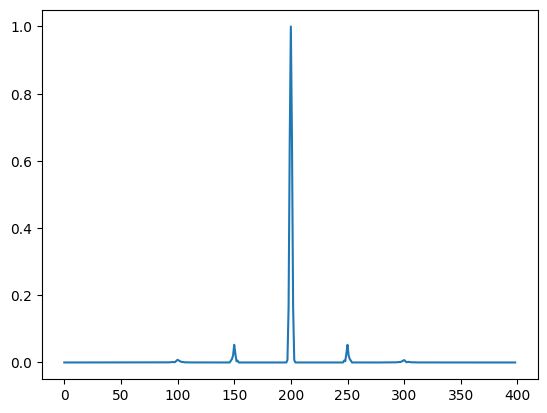

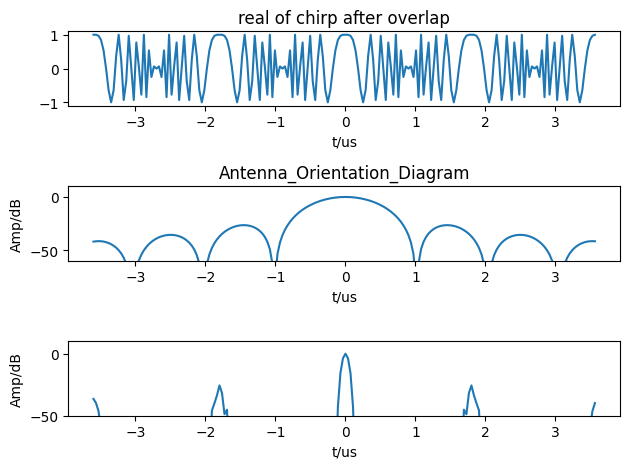

In [49]:


#Antenna_Orientation_Diagram
PRF = T/8
AOD = np.sinc(0.886*t_l_ol/PRF)**2

#x_chirp_ol = np.exp(1j*np.pi*K*((t_l_ol-t_c)**2))
h_m = np.exp(-1j*np.pi*K*((t_l_ol-t_c)**2))*AOD
x_mf = ss.convolve(x_chirp_ol*AOD,h_m)
x_mf = x_mf/np.max(np.abs(x_mf))
plt.figure()
plt.plot(range(len(x_mf)),np.abs(x_mf))
x_mf[N_ol-int(N_ol/2):N_ol-1] += x_mf[N_ol+int(N_ol/2):2*N_ol-1]
x_mf[N_ol:N_ol+int(N_ol/2)] += x_mf[0:int(N_ol/2)]
# h_2 = x_chirp
# h_2_fft = np.conjugate(sf.fft(h_2,N_ol))
# x_2_mf = sf.ifft(sf.fft(x_chirp_ol,N_ol)*h_2_fft)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t_l_ol*1e+6,np.real(x_chirp_ol))
plt.xlabel('t/us')
plt.title("real of chirp after overlap")

plt.subplot(3,1,2)
plt.plot(t_l_ol*1e+6,20*np.log10(AOD))
plt.xlabel('t/us')
plt.ylabel('Amp/dB')
plt.ylim(-60,10)
plt.title('Antenna_Orientation_Diagram')

plt.subplot(3,1,3)
plt.plot(t_l_ol*1e+6,20*np.log10(np.abs(x_mf[N_ol-int(N_ol/2):N_ol+int(N_ol/2)])))
plt.xlabel('t/us')
plt.ylabel('Amp/dB')
plt.ylim(-50,10)
plt.tight_layout()

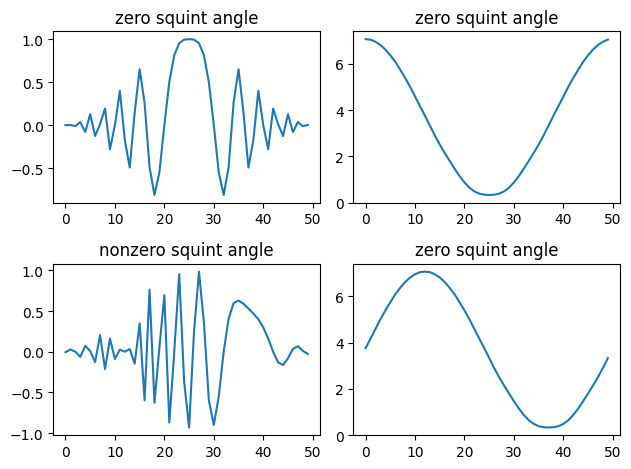

In [59]:
t_l = np.linspace(-T/2,T/2-interval_base_ol,N_ol)
N = N_ol
x_chirp = np.exp(1j*np.pi*K*((t_l-t_c)**2))
PRF = T/8
AOD = np.sinc(0.886*t_l[int(N/2)-int(N/8):int(N/2)+int(N/8)]/PRF)**2
x_chirp_zero = x_chirp[int(N/2)-int(N/8):int(N/2)+int(N/8)]*AOD
x_chirp_nonzero = x_chirp[int(N/2)-int(N/8)-int(N/16):int(N/2)+int(N/8)-int(N/16)]*AOD
plt.figure()
plt.subplot(2,2,1)
plt.plot(range(len(x_chirp_zero)),np.real(x_chirp_zero))
plt.title("zero squint angle")

plt.subplot(2,2,3)
plt.plot(range(len(x_chirp_zero)),np.real(x_chirp_nonzero))
plt.title("nonzero squint angle")

plt.subplot(2,2,2)
plt.plot(range(len(x_chirp_zero)),np.abs(np.fft.fft(x_chirp_zero)))
plt.title("zero squint angle")

plt.subplot(2,2,4)
plt.plot(range(len(x_chirp_zero)),np.abs(np.fft.fft(x_chirp_nonzero)))
plt.title("zero squint angle")
plt.tight_layout()